## Modeling and training a convolutional neural network

In this lab, we will use Keras to train a model that can recognize handwritten digits. Here, you will apply the concepts you have been introduced to during our last class to load the MNIST dataset, preprocess it, normalize it, model, and train a convolutional neural network, and use it to classify your own handwritten digits!

## The dataset

We are going to use the MNIST dataset, which contains 70000 images of handwritten digits. The images are already grayscale, have a consistent size of 28x28 pixels, and are centered, so it will help us a lot with the preprocessing before we get started.

In [68]:
import keras
from keras.datasets import mnist

#Let's load the dataset and split it into test and training datasets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now, let's take some data samples from our dataset to see how they look like: 

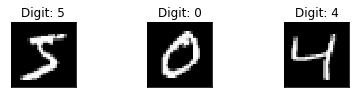

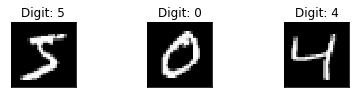

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

### Preprocessing

Even though the dataset is already preprocessed, there are still some steps we need to follow before we can use it in Keras. The main issue here is that we must convert our 3D dataset into a 4D array. Besides, we also need to normalize our RGB values between 0 and 1.

![normalization2](https://user-images.githubusercontent.com/20716798/79002726-5c571600-7b51-11ea-9229-000a7cc01100.png)

In [70]:
#All images inside the MNIST dataset are 28x28 pixels.
IMAGE_WIDTH, IMAGE_HEIGHT = 28,28

# Reshaping the array to 4D
X_train = X_train.reshape(X_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, 1)
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes
X_train /= 255
X_test /= 255

# Just illustrating the example above. A shade of gray with RGB values of 145 would be normalized to something around 0.56
print(145 / 255)

0.5686274509803921


### Encoding our categories

After doing our preprocessing, the label data ( y_train and y_test ) need to be converted into categorical formats. A way to do this is by *one-hot encoding* our categories, so a category 2, for example, would be converted to the vector [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [71]:
## We have ten classes because the handwritten digits can be classified between 0 to 9
number_of_categories = 10
y_train = keras.utils.to_categorical(y_train, number_of_categories)
y_test = keras.utils.to_categorical(y_test, number_of_categories)

### Building our CNN model

In the example below, we are using a convolutional neural network composed of 3 convolutional layers, each of them paired up with relu activations, max-pooling layers, and using dropouts. In the full connected layer, we are using the softmax function with 10 neurons because we want to output a score between the 10 different classes that our model can classify a handwritten digit into. As usual, when using the softmax function, the sum of the scores is equal to one, and the highest value among these scores is the predicted class.

Feel free to play around with the model and experiment other architectures and hyperparameters :D

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[IMAGE_WIDTH, IMAGE_HEIGHT,1]))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

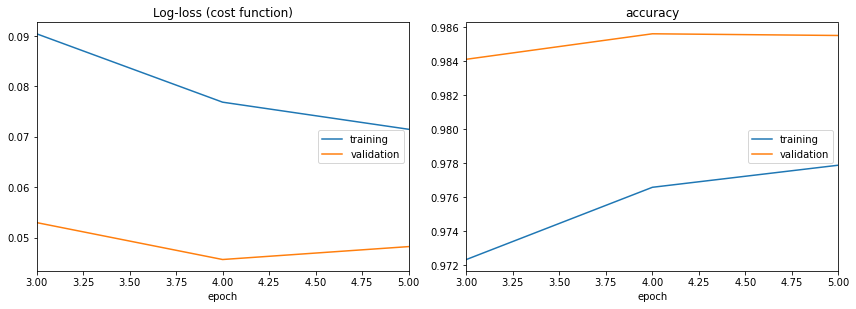

Log-loss (cost function):
training   (min:    0.071, max:    0.307, cur:    0.071)
validation (min:    0.046, max:    0.081, cur:    0.048)

accuracy:
training   (min:    0.902, max:    0.978, cur:    0.978)
validation (min:    0.975, max:    0.986, cur:    0.985)


In [73]:
from livelossplot.keras import PlotLossesCallback

# Training
batch_size = 32
epochs = 5
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[PlotLossesCallback()],
          validation_data=(X_test, y_test))

# creates the models folder if it doesn't exist
![ -d 'models' ] || mkdir 'models'
model.save_weights('models/mnist.h5')


## The predict function

Now let's build our predict function and use it to classify some images! The following images are some handwritten digits that are not part of the MNIST dataset. Try to create your own and see if the model can correctly predict them! :D

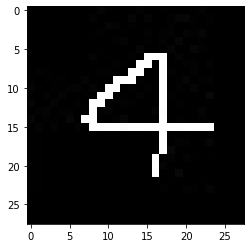

I think this is a number 4


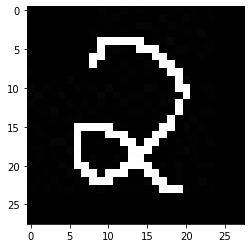

I think this is a number 2


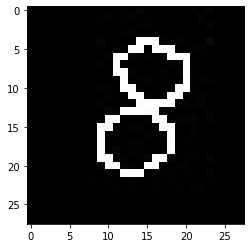

I think this is a number 8


In [76]:
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img


def predict(file,show_img): 
    img = load_image(file)
    digit = model.predict_classes(img)
    if show_img:
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28,28))
        image = 255-image
        plt.imshow(image.reshape(28, 28),cmap='Greys')
        plt.show()
    print("I think this is a number " + str(digit[0])) 
    
predict("images-outside-dataset/four.jpg",True)
predict("images-outside-dataset/two.jpg",True)
predict("images-outside-dataset/eight.jpg",True)